<a href="https://colab.research.google.com/github/sidharth0909/ML-DL/blob/main/Natural_Language_Processing_with_Disaster_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle competitions download -c nlp-getting-started

  0% 0.00/593k [00:00<?, ?B/s]
100% 593k/593k [00:00<00:00, 81.3MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/nlp-getting-started.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('/content/train.csv')

In [8]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords
import re


In [10]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [11]:
nltk.download('stopwords')

# Clean tweet text by removing URLs, special characters, etc.
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    return text

# Apply text cleaning
train_df['text'] = train_df['text'].apply(clean_text)
test_df['text'] = test_df['text'].apply(clean_text)

# Fill missing keyword and location with 'unknown'
train_df['keyword'].fillna('unknown', inplace=True)
train_df['location'].fillna('unknown', inplace=True)
test_df['keyword'].fillna('unknown', inplace=True)
test_df['location'].fillna('unknown', inplace=True)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
tfidf = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=5000)
X_train = tfidf.fit_transform(train_df['text']).toarray()
X_test = tfidf.transform(test_df['text']).toarray()


In [13]:
X = X_train
y = train_df['target']
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
model = LogisticRegression()
model.fit(X_train_split, y_train_split)


LogisticRegression()

In [15]:
y_pred = model.predict(X_val_split)
print(classification_report(y_val_split, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.89      0.83       874
           1       0.82      0.67      0.74       649

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523



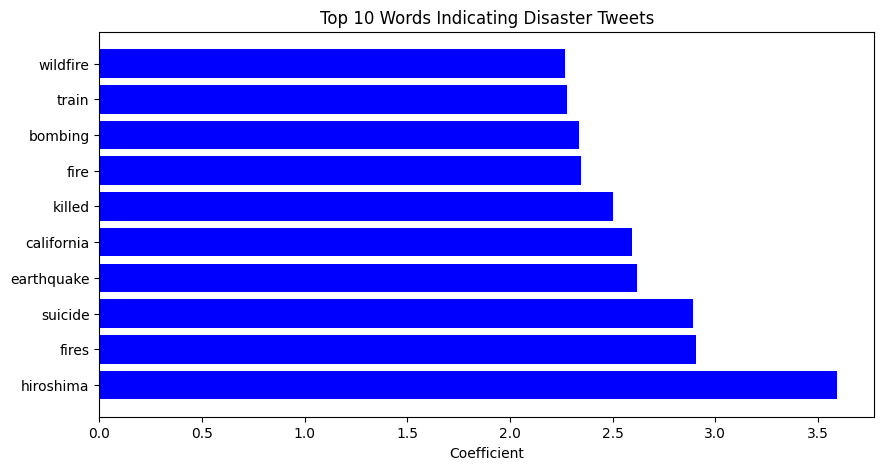

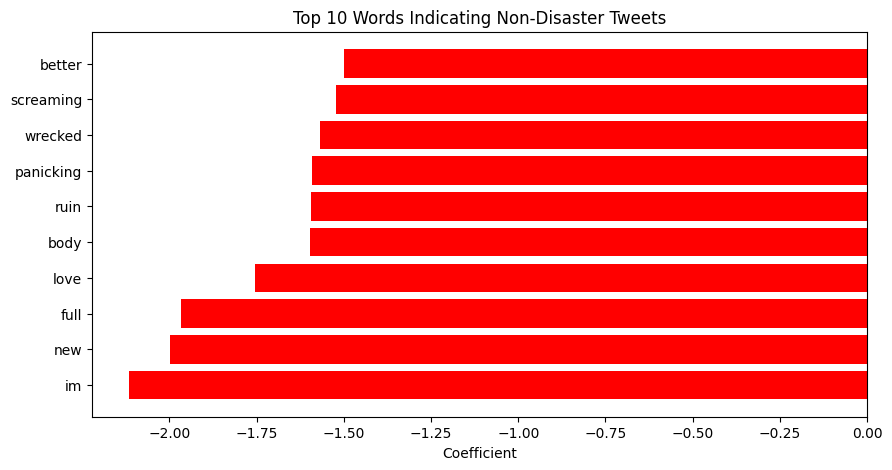

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the model is already trained and tfidf is the vectorizer
# Extract the feature (word) names from the vectorizer
feature_names = np.array(tfidf.get_feature_names_out())

# Get the coefficients of the trained Logistic Regression model
coefficients = model.coef_.flatten()

# Create a DataFrame to organize words with their coefficients
coeff_df = pd.DataFrame({
    'word': feature_names,
    'coefficient': coefficients
})

# Sort the DataFrame by the coefficient values
# Positive coefficients indicate disaster-related words
# Negative coefficients indicate non-disaster-related words
top_positive_words = coeff_df.sort_values(by='coefficient', ascending=False).head(10)
top_negative_words = coeff_df.sort_values(by='coefficient', ascending=True).head(10)

# Plotting the most important words (disaster-related)
plt.figure(figsize=(10, 5))
plt.barh(top_positive_words['word'], top_positive_words['coefficient'], color='blue')
plt.xlabel('Coefficient')
plt.title('Top 10 Words Indicating Disaster Tweets')
plt.show()

# Plotting the most important words (non-disaster-related)
plt.figure(figsize=(10, 5))
plt.barh(top_negative_words['word'], top_negative_words['coefficient'], color='red')
plt.xlabel('Coefficient')
plt.title('Top 10 Words Indicating Non-Disaster Tweets')
plt.show()


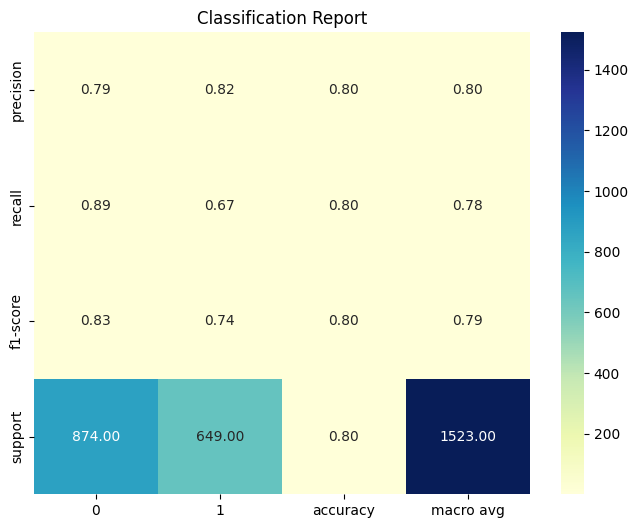

In [23]:
from sklearn.metrics import classification_report

# Print the classification report
report = classification_report(y_val_split, y_pred, output_dict=True)

# Convert the classification report into a dataframe for better visualization
report_df = pd.DataFrame(report).transpose()

# Visualize the classification report using a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="YlGnBu", fmt='.2f')
plt.title('Classification Report')
plt.show()


In [16]:
predictions = model.predict(X_test)


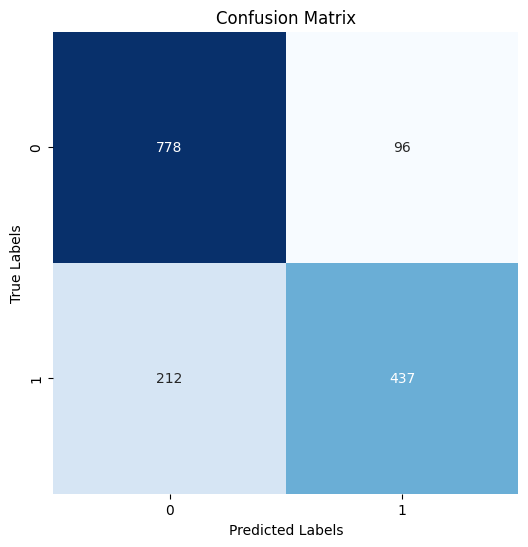

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict on the validation set
y_pred = model.predict(X_val_split)

# Generate the confusion matrix
cm = confusion_matrix(y_val_split, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [29]:
# Example of predicting on new test tweets
sample_tweets = [
    "There's a fire in the building!",
    "I just got a new phone, and it's awesome!",
    "Earthquake near Los Angeles, stay safe everyone!"
]

# Clean the sample tweets
sample_tweets_cleaned = [clean_text(tweet) for tweet in sample_tweets]

# Transform the sample tweets using the trained vectorizer
sample_tweets_vectorized = tfidf.transform(sample_tweets_cleaned)

# Make predictions
predictions = model.predict(sample_tweets_vectorized)

# Print the predictions
for tweet, prediction in zip(sample_tweets, predictions):
    result = "Disaster" if prediction == 1 else "Not a Disaster"
    print(f"Tweet: '{tweet}' --> Prediction: {result}")

Tweet: 'There's a fire in the building!' --> Prediction: Disaster
Tweet: 'I just got a new phone, and it's awesome!' --> Prediction: Not a Disaster
Tweet: 'Earthquake near Los Angeles, stay safe everyone!' --> Prediction: Disaster


In [32]:
print(len(test_df['id']))
print(len(predictions))

predictions = pd.Series(predictions)


3263
3


In [33]:
submission = pd.DataFrame({'id': test_df['id'], 'target': predictions})
submission.to_csv('submission.csv', index=False)
